<a href="https://colab.research.google.com/github/b-paramesh/Dataset_cleaning-Day-11/blob/main/day_11_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab Notebooks/amazon_products_dataset.csv"
df=pd.read_csv(path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


In [16]:
df.head()
df.tail()
df.info()
df.shape
df['brand'].unique()
df.columns
df.isnull().value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


title  brand  category  actual_price  discount_price  rating  rating_count
False  False  False     False         False           False   False           1987
                                                              True               4
                                                      True    False              4
                        True          False           False   False              2
              True      False         False           False   False              2
              False     False         True            False   False              1
Name: count, dtype: int64

Task 2 — Clean the Dataset
Identify missing values using .isnull().sum().
Fill missing numeric values (discount_price, rating, etc.) using mean or median.
Fill missing categorical values (brand, category) with "Unknown".
Remove all duplicate rows.
Convert numeric columns to their correct data types.
Reset index after cleaning.

Task 3 — Data Analysis
Identify the top 5 most expensive products (actual_price).
Find the brand with the highest number of products.
Compute the average discount percentage for each brand.
Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
Compute category-wise average price.

In [17]:
df.isnull().sum()

,0
title,0
brand,0
category,2
actual_price,2
discount_price,1
rating,4
rating_count,4


In [18]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

In [20]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

In [21]:
df.drop_duplicates()
df

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


In [22]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col])

In [13]:
df.reset_index(drop=True)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


In [23]:
df

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


In [24]:
df=df.reset_index(drop=True)

In [27]:
top5_actual_price=df.sort_values(ascending=False,by="actual_price").head(5)
top5_actual_price

,title,brand,category,actual_price,discount_price,rating,rating_count
1383,Android Tablet,JBL,Laptop,79993.0,78094.0,3.0,7666.0
1974,Gaming Laptop,LG,Monitor,79869.0,77173.0,2.6,5232.0
1403,4K Action Camera,Sony,Headphones,79857.0,77469.0,2.7,1379.0
1351,Android Tablet,Sony,Monitor,79853.0,78831.0,4.8,7596.0
42,Gaming Laptop,Apple,Smartwatch,79826.0,76919.0,3.8,10252.0


In [29]:
highest_num = df.groupby('brand').size().sort_values(ascending=False).head(1)
print(highest_num)


brand
Boat    214
dtype: int64


In [31]:
avg_discout_percentage = df.groupby('brand')['discount_price'].mean()
print(avg_discout_percentage)
#

brand
Apple      35889.731579
Boat       36353.115888
Dell       37570.078531
HP         38354.180583
JBL        37380.390821
LG         35108.571154
Mi         36542.437569
OnePlus    39090.550490
Samsung    37931.150732
Sony       37102.337019
Name: discount_price, dtype: float64


In [36]:
top_rated = df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]
top_rated

,title,brand,category,actual_price,discount_price,rating,rating_count
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
32,4K Action Camera,OnePlus,Smartphone,7793.0,5953.0,4.6,5066.0
51,Wireless Bluetooth Headphones,Dell,Headphones,61569.0,59372.0,4.5,13402.0
52,Laptop with SSD Storage,Boat,Smartwatch,76286.0,75621.0,5.0,7433.0
59,Gaming Laptop,Samsung,Tablet,45250.0,44710.0,4.7,4643.0
...,...,...,...,...,...,...,...
1949,Portable Bluetooth Speaker,OnePlus,Tablet,59325.0,55777.0,4.5,19070.0
1970,Android Tablet,Boat,Camera,20841.0,17765.0,4.5,10252.0
1975,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0
1982,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0


In [39]:
categorical=df.groupby('category')['actual_price'].mean()
categorical

,actual_price
category,
Camera,40352.246094
Headphones,39576.147679
Laptop,40822.874477
Monitor,39948.259259
Smartphone,37909.529412
Smartwatch,38316.913934
Speaker,39682.207843
Tablet,39943.815217
Unknown,33610.500000


Task 4 — Programming Task: Feature Engineering + Logical Filters
Task 4A — Create New Columns
Write code to create:
discount_percent = ((actual_price - discount_price) / actual_price) * 100
price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"
popularity_score = rating * log(rating_count + 1)
Task 4B — Filtering Using New Columns
Using the newly created columns:
Show top 10 highest popularity_score products.
Show all Premium category items with discount_percent > 40%.
Show all products whose title contains "Bluetooth" (string filter).
Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())
Task 4C — Grouping with New Columns
Find the average discount_percent for each brand.
Find the average popularity_score for each price_category.
Identify which category offers the highest average discount.
Calculate total revenue potential per brand using:
revenue_potential = actual_price * rating_count

In [40]:
df['discount_percent']=((df['actual_price']-df['discount_price'])/df['actual_price'])*100
df

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644
...,...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0,16.313173
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0,1.359837
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0,12.660361
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0,11.831162


In [42]:
df['price_category'] = pd.cut(
    df['actual_price'],
    bins=[0, 500, 2000, float('inf')],
    labels=['Budget', 'Midrange', 'Premium'],
    right=False
)

In [46]:
import numpy as np
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)

In [47]:
top_10_popularity = df.sort_values(by='popularity_score', ascending=False).head(10)
top_10_popularity

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
1418,Smartphone with AMOLED Display,OnePlus,Laptop,22786.0,22301.0,5.0,18510.0,2.128500,Premium,49.130602
297,Portable Bluetooth Speaker,Samsung,Camera,52713.0,48399.0,5.0,17776.0,8.183939,Premium,48.928304
502,Wireless Bluetooth Headphones,Samsung,Camera,17858.0,14713.0,5.0,16732.0,17.611155,Premium,48.625690
1400,High Resolution Monitor,Dell,Headphones,11025.0,8407.0,5.0,15958.0,23.746032,Premium,48.388891
878,Laptop with SSD Storage,Apple,Smartwatch,4436.0,2614.0,4.9,18895.0,41.073039,Premium,48.248857
1489,High Resolution Monitor,Apple,Laptop,21711.0,20325.0,4.9,18862.0,6.383861,Premium,48.240292
848,High Resolution Monitor,HP,Smartphone,11660.0,9248.0,4.9,18547.0,20.686106,Premium,48.157775
854,Portable Bluetooth Speaker,Samsung,Smartwatch,19284.0,14650.0,4.9,18109.0,24.030284,Premium,48.040676
1625,Gaming Laptop,Dell,Tablet,15099.0,12224.0,5.0,14322.0,19.040996,Premium,47.848110
637,4K Action Camera,Dell,Headphones,35058.0,33177.0,4.9,17254.0,5.365394,Premium,47.803700


In [49]:
premium_high_discount = df[(df['price_category'] == 'Premium') &
                           (df['discount_percent'] > 40)]
premium_high_discount

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
6,Smartphone with AMOLED Display,OnePlus,Laptop,10026.0,5451.0,3.4,18262.0,45.631358,Premium,33.362950
20,4K Action Camera,OnePlus,Headphones,4378.0,103.0,2.7,6412.0,97.647328,Premium,23.668423
53,Noise Cancelling Earbuds,JBL,Camera,2335.0,1338.0,3.4,11284.0,42.698073,Premium,31.726181
74,High Resolution Monitor,Boat,Monitor,5137.0,440.0,1.1,3605.0,91.434690,Premium,9.009390
104,High Resolution Monitor,Sony,Tablet,4933.0,1146.0,2.3,19888.0,76.768701,Premium,22.765221
...,...,...,...,...,...,...,...,...,...,...
1793,High Resolution Monitor,Mi,Headphones,3620.0,1463.0,4.0,17890.0,59.585635,Premium,39.168212
1834,Wireless Bluetooth Headphones,Boat,Headphones,5377.0,790.0,1.4,619.0,85.307792,Premium,9.001607
1841,Noise Cancelling Earbuds,OnePlus,Smartwatch,5877.0,1234.0,3.0,4039.0,79.002893,Premium,24.912000
1875,Wireless Bluetooth Headphones,Dell,Laptop,11037.0,6048.0,1.1,15668.0,45.202501,Premium,10.625383


In [53]:
bluetooth_products = df[df['title'].str.contains("Bluetooth", case=False, na=False)]
bluetooth_products

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
14,Portable Bluetooth Speaker,OnePlus,Camera,25516.0,24050.0,1.7,16989.0,5.745415,Premium,16.558646
18,Portable Bluetooth Speaker,Sony,Monitor,73590.0,69414.0,3.8,9759.0,5.674684,Premium,34.906981
21,Wireless Bluetooth Headphones,Samsung,Speaker,78689.0,76240.0,2.9,10196.0,3.112252,Premium,26.766562
23,Portable Bluetooth Speaker,HP,Smartwatch,4342.0,4235.0,1.4,4820.0,2.464302,Premium,11.873031
25,Wireless Bluetooth Headphones,Boat,Monitor,14689.0,13286.0,3.7,1849.0,9.551365,Premium,27.834881
...,...,...,...,...,...,...,...,...,...,...
1975,Wireless Bluetooth Headphones,Samsung,Smartwatch,31973.0,27058.0,4.5,4288.0,15.372345,Premium,37.637140
1979,Wireless Bluetooth Headphones,Sony,Monitor,65124.0,61923.0,3.3,16581.0,4.915239,Premium,32.063041
1982,Wireless Bluetooth Headphones,HP,Camera,15343.0,10814.0,4.5,7851.0,29.518347,Premium,40.358356
1985,Wireless Bluetooth Headphones,Mi,Smartwatch,50527.0,45694.0,2.8,3692.0,9.565183,Premium,22.999744


In [54]:
popularity_threshold = df['popularity_score'].quantile(0.70)

filtered_products = df[
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50)) &
    (df['popularity_score'] >= popularity_threshold)
]
popularity_threshold

np.float64(32.757478239179804)

In [56]:
avg_discount_brand = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
avg_discount_brand

,discount_percent
brand,
Apple,12.721996
Boat,12.546502
LG,11.968668
HP,11.501202
OnePlus,11.380987
JBL,11.370137
Dell,11.165004
Sony,10.381971
Mi,10.162308


In [57]:
avg_popularity_pricecat = df.groupby('price_category')['popularity_score'].mean()
avg_popularity_pricecat

/tmp/ipython-input-3840755087.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_pricecat = df.groupby('price_category')['popularity_score'].mean()


,popularity_score
price_category,
Budget,38.147220
Midrange,23.660324
Premium,26.365816


In [58]:
highest_discount_category = df.groupby('category')['discount_percent'].mean().sort_values(ascending=False).head(1)
highest_discount_category

,discount_percent
category,
Headphones,12.602766


In [59]:
df['revenue_potential'] = df['actual_price'] * df['rating_count']

revenue_per_brand = df.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
revenue_per_brand

,revenue_potential
brand,
HP,8.297444e+10
OnePlus,8.247380e+10
LG,8.156630e+10
Samsung,8.117230e+10
Sony,7.929952e+10
Boat,7.744207e+10
JBL,7.723438e+10
Mi,7.698029e+10
Dell,7.549826e+10


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

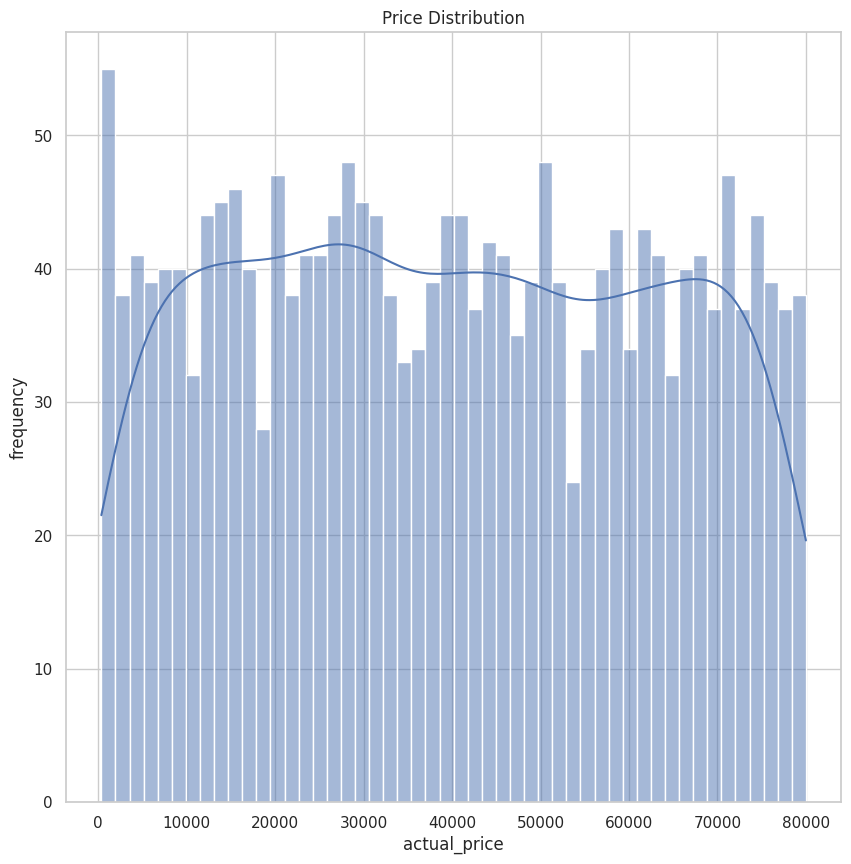

In [61]:
plt.figure(figsize=(10,10))
sns.histplot(df['actual_price'],bins=50,kde=True)
plt.title("Price Distribution")
plt.xlabel("actual_price")
plt.ylabel("frequency")
plt.show()

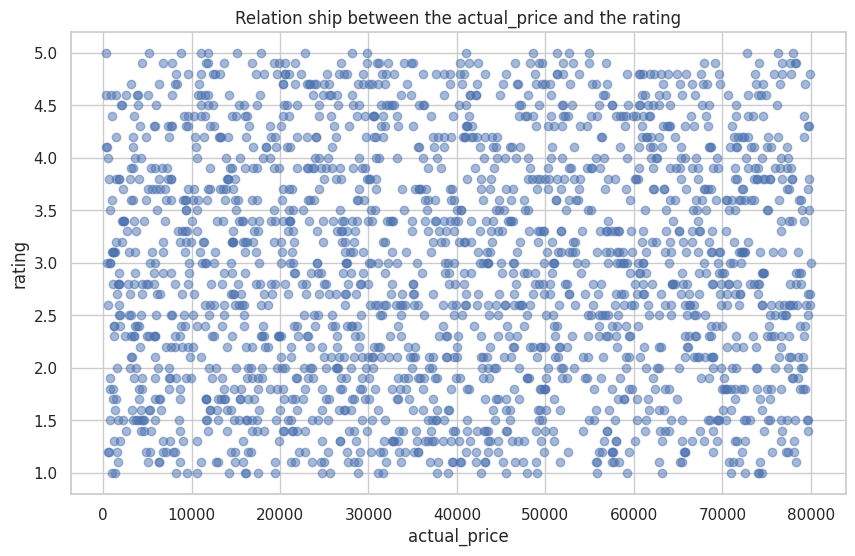

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(df['actual_price'],df['rating'],alpha=0.5)
plt.title("Relation ship between the actual_price and the rating")
plt.xlabel("actual_price")
plt.ylabel("rating")
plt.show()

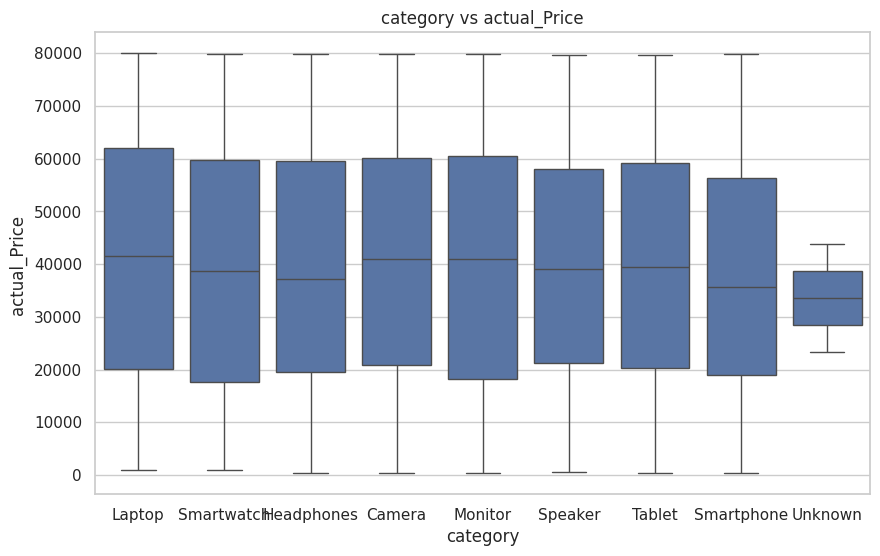

In [67]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['category'], y=df['actual_price'])
plt.title("category vs actual_Price")
plt.xlabel("category")
plt.ylabel("actual_Price ")
plt.show()

/tmp/ipython-input-661455962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values,y=top10.index,palette='viridis')


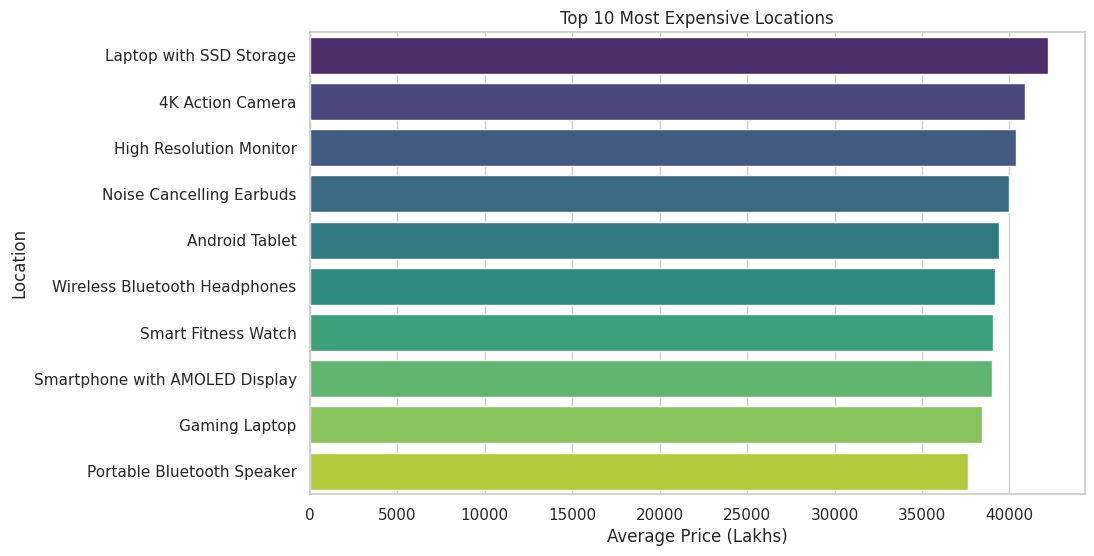

In [68]:
top10=df.groupby('title')['actual_price'].mean().sort_values(ascending=False).head(10)
top10
plt.figure(figsize=(10,6))
sns.barplot(x=top10.values,y=top10.index,palette='viridis')
plt.title("Top 10 Most Expensive Locations")
plt.xlabel("Average Price (Lakhs)")
plt.ylabel("Location")
plt.show()

<Axes: >

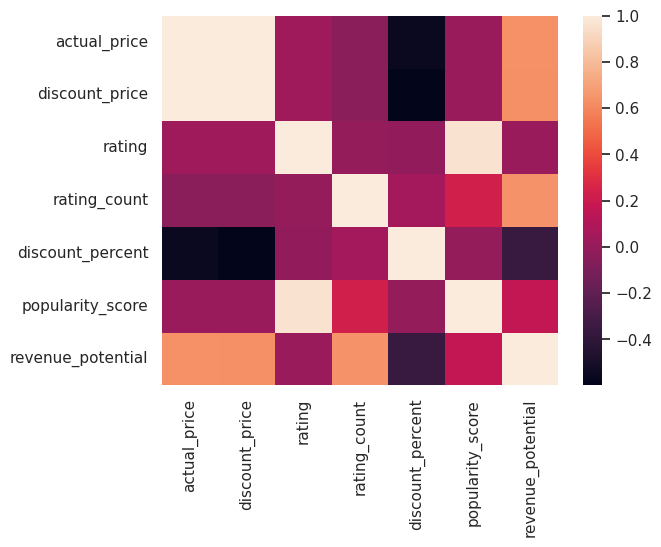

In [69]:
sns.heatmap(df.corr(numeric_only=True))

In [70]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/cleaned_amazon_products_dataset.csv",index=False)
print("saved succefully")

saved succefully
